In [38]:
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from collections import Counter
import rdkit.Chem as Chem
import pandas as pd
import numpy as np
import sklearn
import os

In [39]:
dataset = pd.read_csv('../dataset/compound/cmpd.csv')
dataset.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active


,inchikey,smiles,group,activity,mol,fingerprint
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

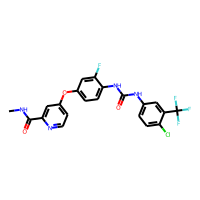
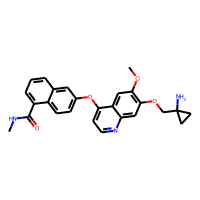
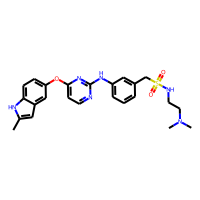
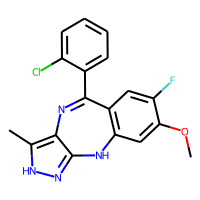
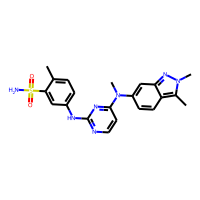

In [40]:
dataset['mol'] = dataset.smiles.apply(Chem.MolFromSmiles)
dataset['fingerprint'] = dataset.mol.apply(lambda mol: list(AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048)))
dataset.head()

In [41]:
train_dataset = dataset[dataset['group'] == 'train']
test_dataset  = dataset[dataset['group'] == 'test'] 

,inchikey,smiles,group,activity,mol,fingerprint
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,IFPPYSWJNWHOLQ-UHFFFAOYSA-N,CCN(CC)CCOc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O...,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."
7,WOSKHXYHFSIKNG-UHFFFAOYSA-N,COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C...,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."

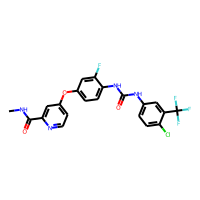
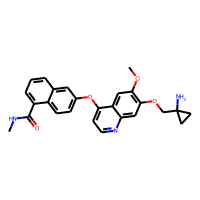
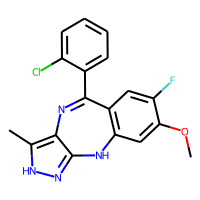
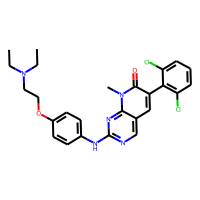
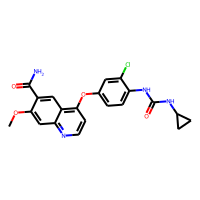

In [42]:
train_dataset.head()

,inchikey,smiles,group,activity,mol,fingerprint
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

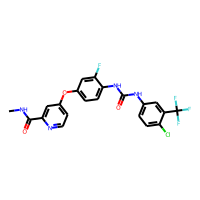
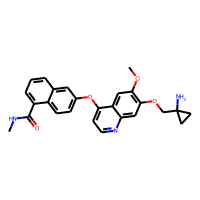
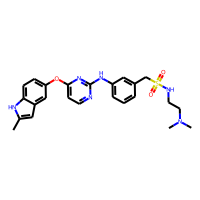
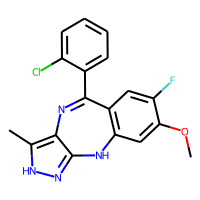
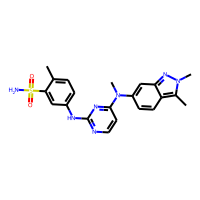

In [43]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(dataset, smilesCol='smiles', molCol = 'mol')

dataset.head()

In [44]:
type(dataset['mol'][0])

rdkit.Chem.rdchem.Mol